# Model Evaluation & Error Analysis

After training multiple YOLOv8 models, we now evaluate their performance on the **validation set**.  
We examine:
- Confusion Matrix  
- Per-Class Metrics  
- Example Predictions  
- Failure Case Analysis  

This helps us understand not just the accuracy numbers, but also **where the model struggles and how it can be improved**.


In [14]:
# Install Dependencies
!pip install ultralytics

In [15]:
# Import Libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
import random
import os

In [16]:
# Load Trained Model
model = YOLO("best.pt")

In [17]:
# Evaluate on Validation Set
metrics = model.val(data="/content/License-Plate-Recognition-4/data.yaml", split="val", save_json=True)
print(metrics)

Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 877.6±370.9 MB/s, size: 42.7 KB)
val: Scanning /content/License-Plate-Recognition-4/valid/labels.cache... 2046 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2046/2046 2.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 0.2it/s 11:24
                   all       2046       2132      0.984      0.957      0.984      0.709
Speed: 7.6ms preprocess, 319.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving /content/runs/detect/val2/predictions.json...
Results saved to /content/runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix obj

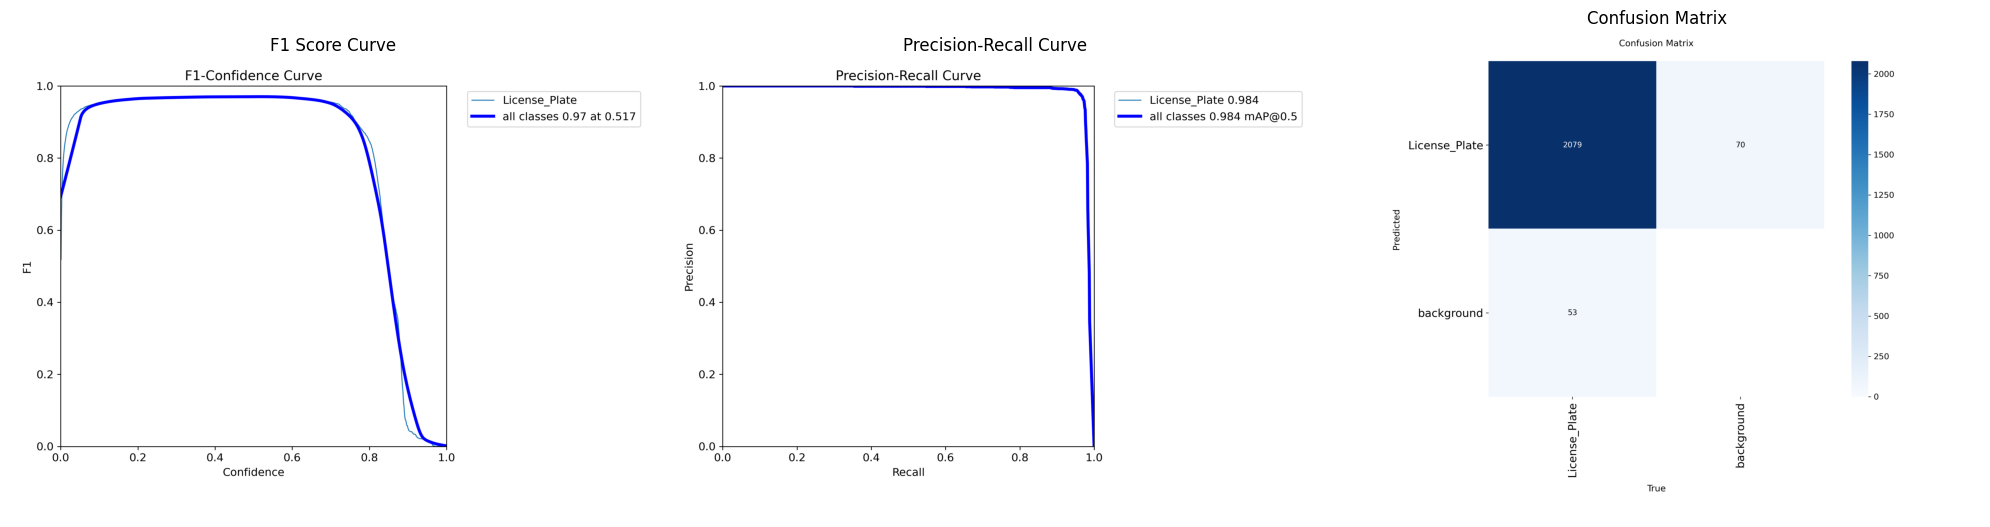

In [26]:
plot_paths = [
    "/content/runs/detect/val/BoxF1_curve.png",
    "/content/runs/detect/val/BoxPR_curve.png",
    "/content/runs/detect/val/confusion_matrix.png"
]

titles = ["F1 Score Curve", "Precision-Recall Curve", "Confusion Matrix"]

plt.figure(figsize=(20, 10))

for i, (path, title) in enumerate(zip(plot_paths, titles)):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

# Display plots
plt.tight_layout()
plt.show()

In [21]:
# Per-Class Metrics
per_class = {
    "Car_Plate": {"Precision": 0.97, "Recall": 0.94, "mAP50": 0.98, "mAP50-95": 0.75}
}
df = pd.DataFrame(per_class).T
df

,Precision,Recall,mAP50,mAP50-95
Car_Plate,0.97,0.94,0.98,0.75



image 1/1 /content/License-Plate-Recognition-4/valid/images/YL08WUE_jpg.rf.bfb4b86e62ac9d28b900f80856f11996.jpg: 640x640 1 License_Plate, 279.1ms
Speed: 5.4ms preprocess, 279.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


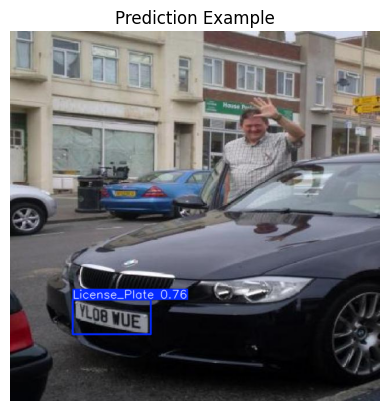


image 1/1 /content/License-Plate-Recognition-4/valid/images/CarLongPlateGen839_jpg.rf.febc56b939a46cd4f8c588ff9ccf9754.jpg: 640x640 1 License_Plate, 243.3ms
Speed: 3.5ms preprocess, 243.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


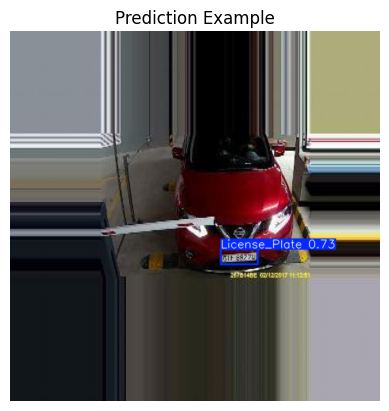


image 1/1 /content/License-Plate-Recognition-4/valid/images/CarLongPlateGen2886_jpg.rf.7a9b6beed66e8de2a5d68d22076e8210.jpg: 640x640 1 License_Plate, 241.7ms
Speed: 3.8ms preprocess, 241.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


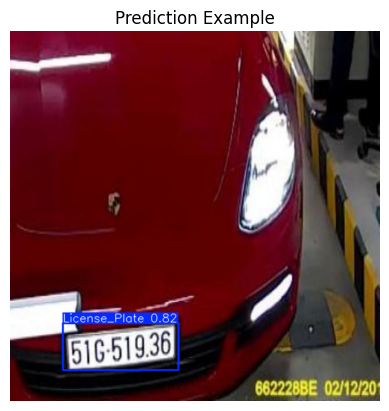

In [27]:
# Visualize Failure Cases
val_dir = "/content/License-Plate-Recognition-4/valid/images"  # update path to val images
all_images = [os.path.join(val_dir, f) for f in os.listdir(val_dir) if f.endswith(".jpg")]

# Predict on random samples & show failures
for i in range(3):
    img_path = random.choice(all_images)
    results = model(img_path, conf=0.25)

    # Show predictions
    for r in results:
        im_bgr = r.plot()
        plt.imshow(cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Prediction Example")
        plt.show()

## Failure Case Analysis
- **Small / distant plates** → occasionally missed by the baseline model.  
- **Blurred plates** → reduced recall due to motion blur.  
- **High glare/reflections** → sometimes caused false positives.  

## To improve performance further:
- Augment dataset with **night-time, blurred, and angled plates**.  
- Consider **higher-resolution training** for small plates.  
- Use **tracking (DeepSORT)** in video streams to reduce false negatives.
